#**Predição com séries temporais do COVID-19: Casos confirmados, Mortes e Casos recuperados**
###O sistema de saúde mundial está prestes a entrar em colapso, com isso a tecnologia e os detentores de informação dela, **devem** propor modelos e soluções para os problemas manifestados. Abaixo, segue a minha contribuição.



#**IMPORTAÇÃO DE BIBLIOTECAS**


In [0]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

#**COLETA E MANIPULAÇÃO DE BANCO DE DADOS**
###Coleta do banco de dados

In [46]:
covid = pd.read_csv('https://raw.githubusercontent.com/NicolasLopes7/predict-covid/master/covid_19_data.csv')
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
13845,13846,04/10/2020,Wyoming,US,2020-04-10 23:01:43,239.0,0.0,0.0
13846,13847,04/10/2020,Xinjiang,Mainland China,2020-04-10 23:01:43,76.0,3.0,73.0
13847,13848,04/10/2020,Yukon,Canada,2020-04-10 23:01:43,8.0,0.0,0.0
13848,13849,04/10/2020,Yunnan,Mainland China,2020-04-10 23:01:43,184.0,2.0,173.0
13849,13850,04/10/2020,Zhejiang,Mainland China,2020-04-10 23:01:43,1267.0,1.0,1235.0


##Manipulação do banco de dados

In [0]:
data11 = [{'SNo':13851.0, 'ObservationDate':'04/11/2020','Province/State':'global','Country/Region':'global','Last Update':'2020-04-11 23:01:43','Confirmed': 1827284.0, 'Deaths':113031.0, 'Recovered': 416620.0}]
covid = covid.append(data11)
covid.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country',"Deaths":"Mortes", "Confirmed":"Confirmado", "Recovered":"Recuperado"}, inplace=True)

In [48]:
mortes = covid.groupby('Date').sum()['Mortes'].reset_index()
confirmados = covid.groupby('Date').sum()['Confirmado'].reset_index()
recuperados = covid.groupby('Date').sum()['Recuperado'].reset_index()
data = pd.concat([mortes, confirmados.Confirmado, recuperados.Recuperado], ignore_index=False, axis=1)
# mortes
# mortes.tail()
data.tail()

,Date,Mortes,Confirmado,Recuperado
76,04/07/2020,81865.0,1426096.0,300054.0
77,04/08/2020,88338.0,1511104.0,328661.0
78,04/09/2020,95455.0,1595350.0,353975.0
79,04/10/2020,102525.0,1691719.0,376096.0
80,04/11/2020,113031.0,1827284.0,416620.0


##Plotagem dos dados base (Sem nenhuma técnica aplicada)


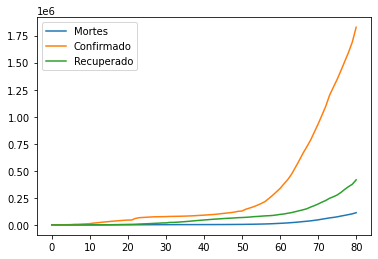

In [49]:
data.plot()

#**PREDIÇÃO (MORTES, CASOS CONFIRMADOS E CASOS RECUPERADOS)**
##Preparação do banco de dados

In [0]:
mortes.columns = ['ds', 'y']
confirmados.columns = ['ds', 'y']
recuperados.columns = ['ds', 'y']

confirmados['ds'] = pd.to_datetime(confirmados['ds'])
recuperados['ds'] = pd.to_datetime(recuperados['ds'])
mortes['ds'] = pd.to_datetime(mortes['ds'])

### Seleção da quantidade de dias da previsão

In [0]:
dias = 7

##**Criação instância do objeto Prophet** (Responsável pela previsão)
###Atribuição de features (Casos confirmados, Recuperados e Mortes)

In [52]:
m = Prophet(interval_width=0.95)
c = Prophet(interval_width=0.95)
r = Prophet(interval_width=0.95)
m.fit(mortes)
c.fit(confirmados)
r.fit(recuperados)
futuroM = m.make_future_dataframe(periods=dias)
futuroC = c.make_future_dataframe(periods=dias)
futuroR = r.make_future_dataframe(periods=dias)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##**Execução dos Métodos de predição**

In [53]:
previsaoM = m.predict(futuroM)
previsaoC = c.predict(futuroC)
previsaoR = r.predict(futuroR)
previsaoC

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-8.893075e+03,-3.766323e+04,2.113811e+04,-8.893075e+03,-8.893075e+03,-186.162636,-186.162636,-186.162636,-186.162636,-186.162636,-186.162636,0.0,0.0,0.0,-9.079237e+03
1,2020-01-23,-6.097665e+03,-3.596733e+04,2.363291e+04,-6.097665e+03,-6.097665e+03,-774.221856,-774.221856,-774.221856,-774.221856,-774.221856,-774.221856,0.0,0.0,0.0,-6.871887e+03
2,2020-01-24,-3.302256e+03,-2.990939e+04,2.368638e+04,-3.302256e+03,-3.302256e+03,635.319347,635.319347,635.319347,635.319347,635.319347,635.319347,0.0,0.0,0.0,-2.666937e+03
3,2020-01-25,-5.068464e+02,-2.083682e+04,3.466244e+04,-5.068464e+02,-5.068464e+02,6540.317814,6540.317814,6540.317814,6540.317814,6540.317814,6540.317814,0.0,0.0,0.0,6.033471e+03
4,2020-01-26,2.288563e+03,-2.622729e+04,3.086617e+04,2.288563e+03,2.288563e+03,-2003.817054,-2003.817054,-2003.817054,-2003.817054,-2003.817054,-2003.817054,0.0,0.0,0.0,2.847459e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2020-04-14,1.978658e+06,1.942471e+06,2.007020e+06,1.963218e+06,1.993611e+06,-1381.206638,-1381.206638,-1381.206638,-1381.206638,-1381.206638,-1381.206638,0.0,0.0,0.0,1.977277e+06
84,2020-04-15,2.056312e+06,2.021890e+06,2.091333e+06,2.033619e+06,2.079151e+06,-186.162636,-186.162636,-186.162636,-186.162636,-186.162636,-186.162636,0.0,0.0,0.0,2.056126e+06
85,2020-04-16,2.133966e+06,2.089283e+06,2.172743e+06,2.101125e+06,2.165640e+06,-774.221856,-774.221856,-774.221856,-774.221856,-774.221856,-774.221856,0.0,0.0,0.0,2.133192e+06
86,2020-04-17,2.211619e+06,2.160310e+06,2.258455e+06,2.167914e+06,2.253701e+06,635.319347,635.319347,635.319347,635.319347,635.319347,635.319347,0.0,0.0,0.0,2.212255e+06


#**PREDIÇÃO DOS CASOS CONFIRMADOS PARA OS PRÓXIMOS 7 DIAS**

In [54]:
print("Confirmados: ")
confirmados = pd.concat([previsaoC.ds.tail(7), previsaoC.yhat_upper.tail(7), previsaoC.yhat_lower.tail(7)], ignore_index=False, axis=1)
confirmados



Confirmados: 


,ds,yhat_upper,yhat_lower
81,2020-04-12,1.849614e+06,1.793499e+06
82,2020-04-13,1.927541e+06,1.868692e+06
83,2020-04-14,2.007020e+06,1.942471e+06
84,2020-04-15,2.091333e+06,2.021890e+06
85,2020-04-16,2.172743e+06,2.089283e+06
86,2020-04-17,2.258455e+06,2.160310e+06
87,2020-04-18,2.352987e+06,2.235192e+06


#**PREDIÇÃO DOS CASOS RECUPERADOS PARA OS PRÓXIMOS 7 DIAS**


In [55]:
print("Recuperados: ")
recuperados = pd.concat([previsaoR.ds.tail(7), previsaoR.yhat_upper.tail(7), previsaoR.yhat_lower.tail(7)], ignore_index=False, axis=1)
recuperados

Recuperados: 


,ds,yhat_upper,yhat_lower
81,2020-04-12,400175.678927,368455.912304
82,2020-04-13,417559.970975,383156.791336
83,2020-04-14,433916.670907,399157.977037
84,2020-04-15,453045.552850,417425.275401
85,2020-04-16,466992.091514,433639.881046
86,2020-04-17,483671.057079,447890.966303
87,2020-04-18,504220.959939,465773.197201


#**PREDIÇÃO DAS MORTES PARA OS PRÓXIMOS 7 DIAS**


In [56]:
print("Mortos: ")
mortos = pd.concat([previsaoM.ds.tail(7), previsaoM.yhat_upper.tail(7), previsaoM.yhat_lower.tail(7)], ignore_index=False, axis=1)
mortos

Mortos: 


,ds,yhat_upper,yhat_lower
81,2020-04-12,111155.544828,103628.661646
82,2020-04-13,116139.854404,108276.081963
83,2020-04-14,121824.154533,114025.125411
84,2020-04-15,127405.623361,119110.557903
85,2020-04-16,132603.255352,124268.205781
86,2020-04-17,137997.270426,128942.486008
87,2020-04-18,144127.163189,134214.741453


#**GRÁFICO DE MORTOS**
###(Os pontos pretos, significam os dados reais, a linha azul o previsto e o sombreamento, a margem de erro)

Ponto máximo de mortes em 7 dias: 144127
 Ponto mínimo de mortes em 7 dias : 134215


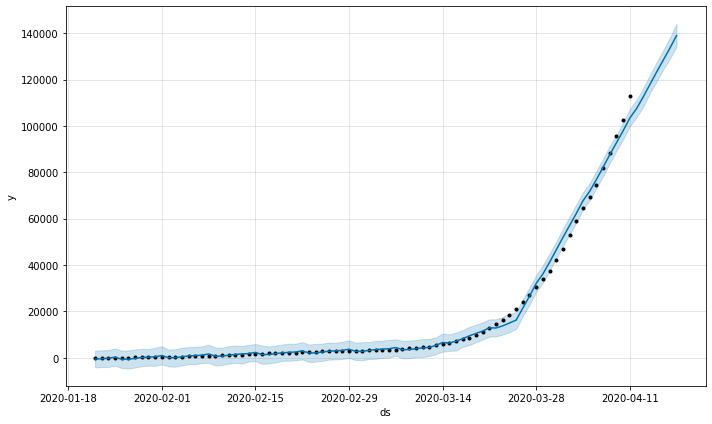

In [57]:
print("Ponto máximo de mortes em 7 dias: {:.0f}\n Ponto mínimo de mortes em 7 dias : {:.0f}".format(mortos.yhat_upper.tail(1).values[0], mortos.yhat_lower.tail(1).values[0]))
grafico_previsaoM = m.plot(previsaoM)


#**GRÁFICO DE CASOS CONFIRMADOS**

Ponto máximo de casos confirmados em 7 dias: 2352987
 Ponto mínimo de casos confirmados em 7 dias : 2235192


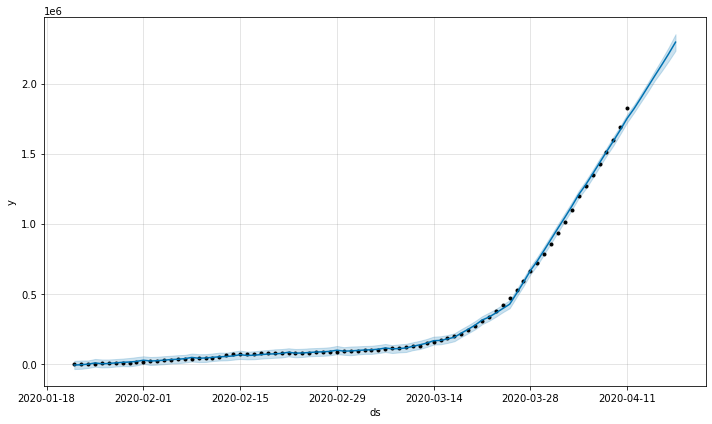

In [58]:
print("Ponto máximo de casos confirmados em 7 dias: {:.0f}\n Ponto mínimo de casos confirmados em 7 dias : {:.0f}".format(confirmados.yhat_upper.tail(1).values[0], confirmados.yhat_lower.tail(1).values[0]))
grafico_previsaoC = c.plot(previsaoC)


#**GRÁFICO DE CASOS RECUPERADOS**

Ponto máximo de casos recuperados em 7 dias: 504221
 Ponto mínimo de casos recuperados em 7 dias : 465773


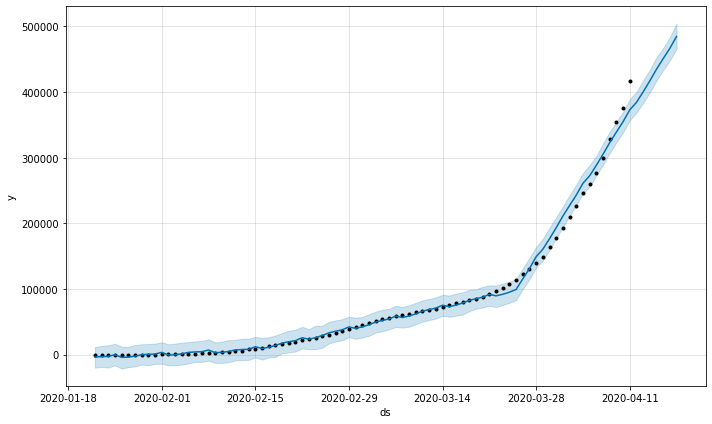

In [59]:
print("Ponto máximo de casos recuperados em 7 dias: {:.0f}\n Ponto mínimo de casos recuperados em 7 dias : {:.0f}".format(recuperados.yhat_upper.tail(1).values[0], recuperados.yhat_lower.tail(1).values[0]))
grafico_previsaoR = r.plot(previsaoR)